In [48]:
#Import modules and create  dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



In [3]:
df = pd.read_csv('drive/MyDrive/Colabnotebooks/CarPrice_Assignment.csv')

In [4]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
df.head().tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.rename(columns={'car_ID':'c_id','symboling':'c_symnol','CarName':'carname','fueltype':'ftype','aspiration':'asp','doornumber':'dno','carbody':'body','drivewheel':'drivewheel'},inplace=True)

In [7]:
df.isnull().sum()

c_id                0
c_symnol            0
carname             0
ftype               0
asp                 0
dno                 0
body                0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.describe()

,c_id,c_symnol,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.corr

<bound method DataFrame.corr of      c_id  c_symnol                   carname   ftype    asp   dno  \
0       1         3        alfa-romero giulia     gas    std   two   
1       2         3       alfa-romero stelvio     gas    std   two   
2       3         1  alfa-romero Quadrifoglio     gas    std   two   
3       4         2               audi 100 ls     gas    std  four   
4       5         2                audi 100ls     gas    std  four   
..    ...       ...                       ...     ...    ...   ...   
200   201        -1           volvo 145e (sw)     gas    std  four   
201   202        -1               volvo 144ea     gas  turbo  four   
202   203        -1               volvo 244dl     gas    std  four   
203   204        -1                 volvo 246  diesel  turbo  four   
204   205        -1               volvo 264gl     gas  turbo  four   

            body drivewheel enginelocation  wheelbase  ...  enginesize  \
0    convertible        rwd          front       88.6

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   c_id              205 non-null    int64  
 1   c_symnol          205 non-null    int64  
 2   carname           205 non-null    object 
 3   ftype             205 non-null    object 
 4   asp               205 non-null    object 
 5   dno               205 non-null    object 
 6   body              205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
import seaborn as sbn

<Axes: xlabel='price'>

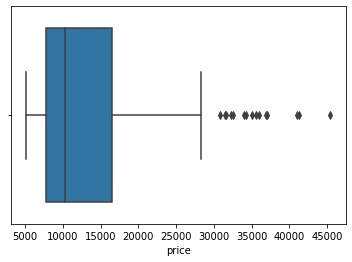

In [12]:
sbn.boxplot(x = df['price'])

<Axes: xlabel='citympg', ylabel='highwaympg'>

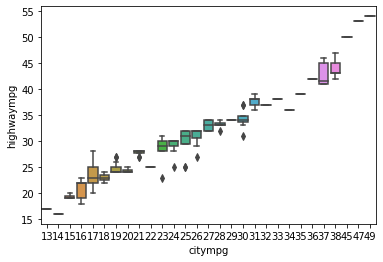

In [13]:
sbn.boxplot(x = df['citympg'], y=df['highwaympg'])

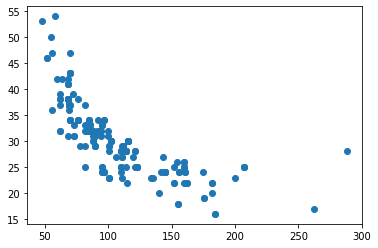

In [14]:
mpt.scatter(x = df['horsepower'], y=df['highwaympg'])

<Axes: xlabel='horsepower', ylabel='price'>

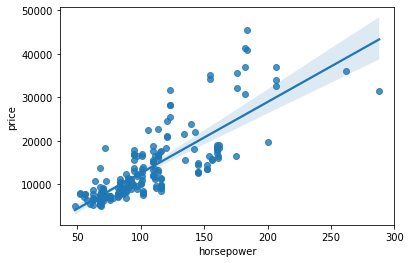

In [15]:
sbn.regplot(x='horsepower',y='price',data=df)

<Axes: xlabel='boreratio', ylabel='compressionratio'>

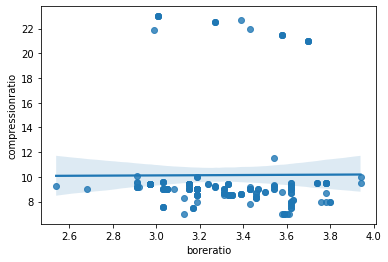

In [16]:
sbn.regplot(x='boreratio',y='compressionratio',data=df)

<Axes: xlabel='carlength', ylabel='price'>

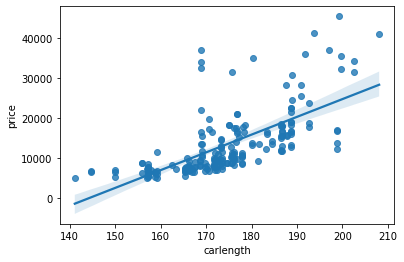

In [17]:
sbn.regplot(x='carlength',y='price',data=df)

In [18]:
df['ftype']=df['ftype'].astype('category')
df['ftype']=df['ftype'].cat.codes
df

,c_id,c_symnol,carname,ftype,asp,dno,body,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [19]:
df['dno']=df['dno'].astype('category')
df['dno']=df['dno'].cat.codes
df

,c_id,c_symnol,carname,ftype,asp,dno,body,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,std,1,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,std,1,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,std,1,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,std,0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,std,0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,std,0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,turbo,0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,std,0,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,turbo,0,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [22]:
df['drivewheel']=df['drivewheel'].astype('category')
df['drivewheel']=df['drivewheel'].cat.codes
df

,c_id,c_symnol,carname,ftype,asp,dno,body,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,std,1,convertible,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,std,1,convertible,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,std,1,hatchback,2,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,std,0,sedan,1,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,std,0,sedan,0,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,std,0,sedan,2,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,turbo,0,sedan,2,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,std,0,sedan,2,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,turbo,0,sedan,2,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [23]:
df['enginelocation']=df['enginelocation'].astype('category')
df['enginelocation']=df['enginelocation'].cat.codes
df

,c_id,c_symnol,carname,ftype,asp,dno,body,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,std,1,convertible,2,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,std,1,convertible,2,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,std,1,hatchback,2,0,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,std,0,sedan,1,0,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,std,0,sedan,0,0,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,std,0,sedan,2,0,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,turbo,0,sedan,2,0,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,std,0,sedan,2,0,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,turbo,0,sedan,2,0,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [24]:
df['asp']=df['asp'].astype('category')
df['asp']=df['asp'].cat.codes

df['body']=df['body'].astype('category')
df['body']=df['body'].cat.codes
df['enginetype']=df['enginetype'].astype('category')
df['enginetype']=df['enginetype'].cat.codes

df

,c_id,c_symnol,carname,ftype,asp,dno,body,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,0,3,2,0,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,0,3,2,0,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,0,3,2,0,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,0,3,2,0,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   c_id              205 non-null    int64  
 1   c_symnol          205 non-null    int64  
 2   carname           205 non-null    object 
 3   ftype             205 non-null    int8   
 4   asp               205 non-null    int8   
 5   dno               205 non-null    int8   
 6   body              205 non-null    int8   
 7   drivewheel        205 non-null    int8   
 8   enginelocation    205 non-null    int8   
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int8   
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [32]:
sand = df.drop(columns= ['carname','cylindernumber','peakrpm','stroke','boreratio','compressionratio','fuelsystem'])
sand.isnull().sum()

c_id              0
c_symnol          0
ftype             0
asp               0
dno               0
body              0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
enginetype        0
enginesize        0
horsepower        0
citympg           0
highwaympg        0
price             0
dtype: int64

In [33]:
x=sand.drop(columns='price')
x

,c_id,c_symnol,ftype,asp,dno,body,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,horsepower,citympg,highwaympg
0,1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,130,111,21,27
1,2,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,130,111,21,27
2,3,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,152,154,19,26
3,4,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,109,102,24,30
4,5,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,136,115,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,141,114,23,28
201,202,-1,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,141,160,19,25
202,203,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,173,134,18,23
203,204,-1,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,145,106,26,27


In [34]:
y = sand['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3, random_state = 0)

In [36]:
lr = linear_model.LinearRegression()

In [37]:
lr.fit(X_train,Y_train)

LinearRegression()

In [40]:
c=lr.intercept_

In [41]:
c

-64418.416578858545

In [42]:
m=lr.coef_

In [43]:
m

array([-1.66520121e+01,  1.83217458e+02, -1.32735190e+03, -9.62766286e+02,
       -1.50356313e+03, -8.14228756e+02,  1.69029135e+03,  1.29629842e+04,
        1.36118083e+02, -9.41956389e+01,  8.69044509e+02,  1.29117011e+02,
        3.29949299e+00,  1.74850065e+02,  4.42701375e+01,  4.79322801e+01,
        3.92215375e+01, -3.53286828e+01])

In [45]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([ 7969.06990775, 11936.83854302, 11352.86962366, 19534.36415938,
       10531.96974408,  6844.71062227,  6102.24040187,  5178.64344816,
        6627.75891454,  7907.49399123,  6548.71234731,  6832.37019514,
        8216.79508876, 19834.06584956,  6382.43332018, 17431.44239207,
        7713.53144935, 19772.00686849, 19384.90871183, 20307.52961981,
        7530.88090107, 19719.20178397,  8536.65215892, 34224.84986309,
       13238.269657  , 12745.38799812, 17655.27811537,  6109.39507663,
       11903.53451872, 19187.08169933, 11132.47569559, 10304.67159391,
       16422.70687005,  8635.84333847, 12245.06112223, 17243.39428827,
       36626.72611639, 15481.4383067 ,  6427.33640709,  4980.65934245,
        6979.22016603, 13124.55779163,  5202.35808794,  5055.01050724,
        5949.68832472, 16489.24350959,  6740.44867149, 14183.2398706 ,
        4846.18435529, 19767.45780098,  5714.62295438, 12733.95164502,
        7583.78491562, 11383.6539211 , 25593.47769626, 37015.9023877 ,
      

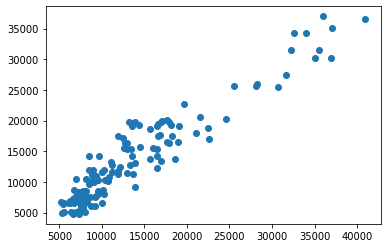

In [46]:
mpt.scatter(Y_train, y_pred_train)

<function matplotlib.pyplot.show(close=None, block=None)>

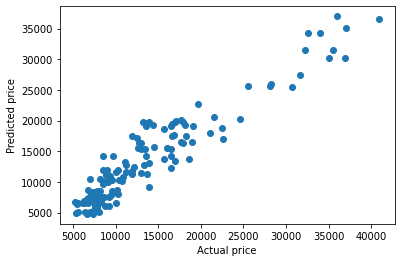

In [53]:
# This may not work but lets try
mpt.scatter(Y_train, y_pred_train)
mpt.xlabel('Actual price')
mpt.ylabel('Predicted price')
mpt.show

In [50]:
r2_score(Y_train,y_pred_train)

0.8973412644013907

<function matplotlib.pyplot.show(close=None, block=None)>

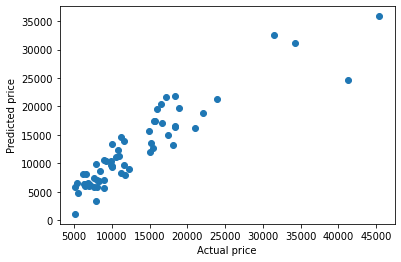

In [55]:
y_pred_test = lr.predict(X_test)
mpt.scatter(Y_test, y_pred_test)
mpt.xlabel('Actual price')
mpt.ylabel('Predicted price')
mpt.show

In [56]:
r2_score(Y_test,y_pred_test)

0.8305550246433938